<a href="https://colab.research.google.com/github/zizanayub/Machine-Leaning-Data-Scientist-with-Python/blob/main/01_01_Supervised_Learning_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('/content/drive/MyDrive/Machine Learning Data Scientist Course/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 01. Using Scikit-Learn to fit a classifier

In [3]:
from sklearn.neighbors import KNeighborsClassifier  ##Q1
X = churn_df[["total_day_charge","total_eve_charge"]].values #Q3
y = churn_df['churn'].values ##Q4
print(X.shape,y.shape)

(3333, 2) (3333,)


In [4]:
knn = KNeighborsClassifier(n_neighbors = 6)   ##Q2
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
X_new = np.array([[78,87.2],[21.2,67],[78.1,99]])
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions))

Predictions: [1 0 1]


##02. Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 21,test_size = 0.3,stratify = y)  #Q1. Explain all of the parameters.
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))        #Q2. `knn.score(X_test,y_test)`, WHAT and HOW?

0.872


##03. Model Complexity and over/underfitting

In [8]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train,y_train)
  train_accuracies[neighbor] = knn.score(X_train,y_train)
  test_accuracies[neighbor] = knn.score(X_test,y_test)


print(train_accuracies)
print(test_accuracies)

{1: 1.0, 2: 0.9061294470638662, 3: 0.9048435490784398, 4: 0.8911273039005573, 5: 0.8906986712387484, 6: 0.8851264466352337, 7: 0.8829832833261895, 8: 0.8825546506643807, 9: 0.8834119159879983, 10: 0.8825546506643807, 11: 0.8812687526789541, 12: 0.8804114873553365, 13: 0.8816973853407629, 14: 0.8799828546935277, 15: 0.8834119159879983, 16: 0.8812687526789541, 17: 0.8808401200171453, 18: 0.8795542220317188, 19: 0.8786969567081011, 20: 0.8808401200171453, 21: 0.8808401200171453, 22: 0.8782683240462923, 23: 0.8821260180025718, 24: 0.8774110587226747, 25: 0.8812687526789541}
{1: 0.807, 2: 0.871, 3: 0.855, 4: 0.873, 5: 0.867, 6: 0.872, 7: 0.875, 8: 0.876, 9: 0.88, 10: 0.878, 11: 0.878, 12: 0.877, 13: 0.878, 14: 0.877, 15: 0.879, 16: 0.881, 17: 0.879, 18: 0.876, 19: 0.878, 20: 0.877, 21: 0.876, 22: 0.877, 23: 0.881, 24: 0.879, 25: 0.88}


##04. Plotting Training and Test Accuracies

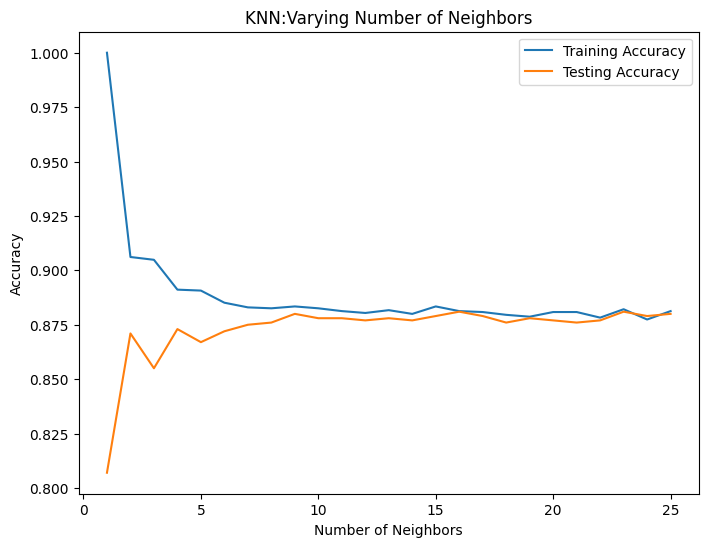

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("KNN:Varying Number of Neighbors")
plt.plot(neighbors,train_accuracies.values(),label = "Training Accuracy")
plt.plot(neighbors,test_accuracies.values(),label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()